In [1]:
import numpy as np
import foapgb

from scipy.spatial import distance

In [2]:
# Number of columns
Num_Cols = 50

# 格子は0-10に存在するする
Spartial_Scaling = 10/(Num_Cols)

city_network = foapgb.make_lattice(Num_Cols)
K = Num_Cols * Num_Cols


# 通勤費用パラメータ
t = 0.1

# 距離抵抗パラメータ
tau = 0.5

# 労働投入量
L = 1.0

# 総土地供給量は100*100=100とする
Total_S = 100

Coordinate_Data = \
np.array([(city_network['node_dic'][str(i)]['x_pos']*Spartial_Scaling, 
           city_network['node_dic'][str(i)]['y_pos']*Spartial_Scaling) for i in range(K)])
distance_matrix = distance.squareform(distance.pdist(Coordinate_Data))


# theta -> infty = deterministic model 
theta_N = 1.0
theta_M = 1.0


print('theta_N=', theta_N)
print('theta_M=', theta_M)

print('t=', t)
print('tau=', tau)

theta_N= 1.0
theta_M= 1.0
t= 0.1
tau= 0.5


In [3]:
prm = foapgb.Parameter(K, distance_matrix, t, tau, L, Total_S, theta_M, theta_N)
sub = foapgb.Sub(prm)
    
master = foapgb.Master(prm, sub, itr_max_sub=100, err_sub=10**(-3))
    

In [4]:
# 初期解を均等分布で与える場合
# m0 = prm.M*(np.ones(K)/K)

# 初期解をランダムに与える場合
m0 = master.make_random_m()

In [5]:
m_hist, F_hist = master.solve(m0=m0, err_mas=10**(-4), max_itr=100, Lip=1500)

In [6]:
len(m_hist)

44

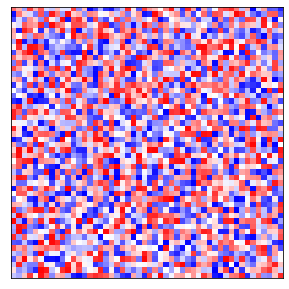

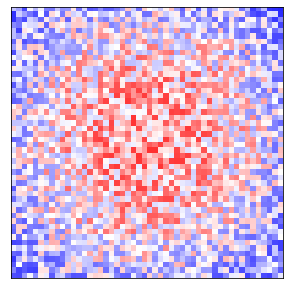

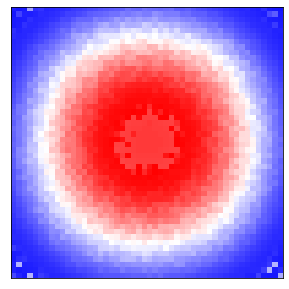

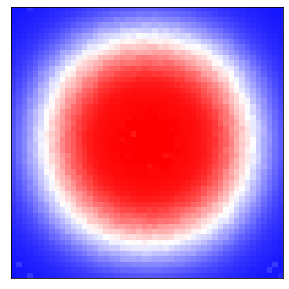

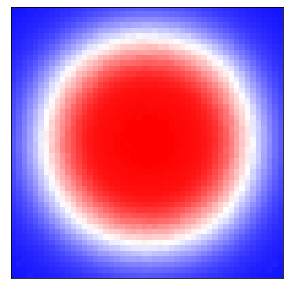

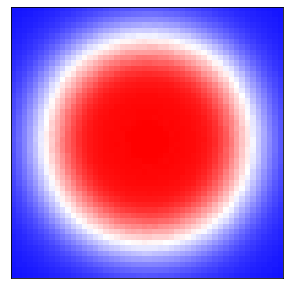

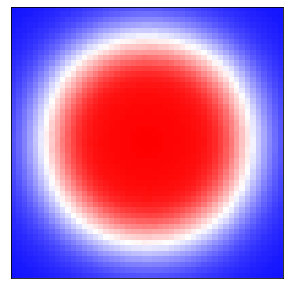

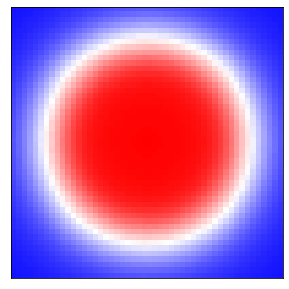

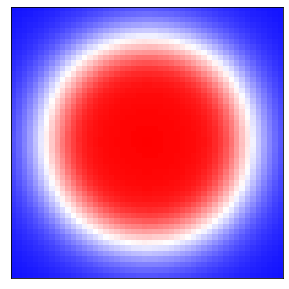

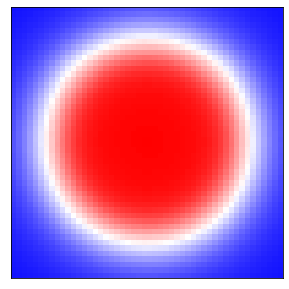

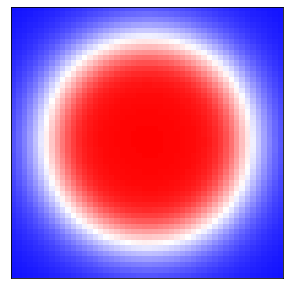

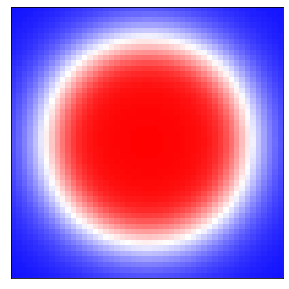

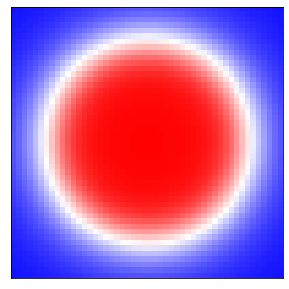

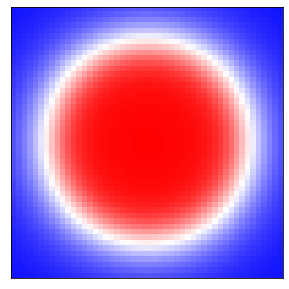

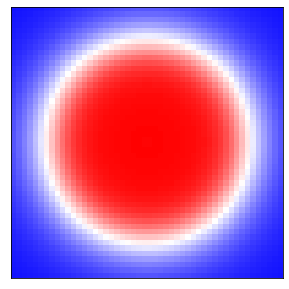

In [7]:
for k, v in m_hist.items():
    if k%3 == 0:
        foapgb.m_image(prm, v)